In [1]:
# Support Vector Machine : perceptron의 확장
# perceptron: 분류 오차 최소화 <--> SVM: 클래스를 구분하는 마진 최대화
# 마진: 클래스를 구분하는 결정경계와, 결정경계에 가장 가까운 훈련샘플(서포트벡터) 사이의 거리 = 2/(||w||)
# SVM: 모든 샘플이 부류된 가정 하에 마진을 최대화하는것

# 슬랙변수 = 소프트마진분류: 선형적으로 구분되지 않는 데이터에서 선형제약조건을 완화하기 위해 도입
# 적절한 비용손해를 감수하며 최적화 알고리즘을 진행
# 이때 목적함수 = 2/(||w||) + C(sum of slack)
# C값이 크면 > 슬랙을 작게가져가야함 >  마진을 적게가져가며 분류오차에 민감
# C값이 작을수록 > 슬랙을 크게가져가도됨 > 마진을 크게가져가며 분류오차에 덜 민감

In [5]:
# 분류에 필요한 데이터 import

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y)

sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [8]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt


def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # 마커와 컬러맵을 설정
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # 결정 경계 pltf로 표시
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # 테스트 샘플을 강조하기 위함
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')
        
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))

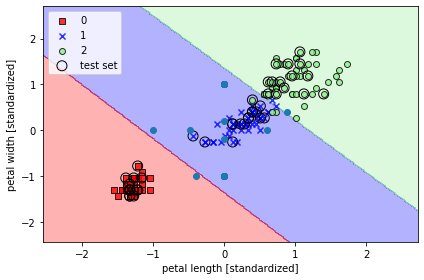

In [9]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', C=1.0, random_state=1)
svm.fit(X_train_std, y_train)

plot_decision_regions(X_combined_std, 
                      y_combined,
                      classifier=svm, 
                      test_idx=range(105, 150))
plt.scatter(svm.dual_coef_[0, :], svm.dual_coef_[1, :])
plt.xlabel('petal length [standardized]')
plt.ylabel('petal width [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [10]:
# logistic regression: likelihood 최대화기때문에 SVM보다 이상치에 민감. 대신 모델이 간단하고 구현이 쉬움
# SVM: 결정경계에 가까운 서포트벡터에 대부분 관심을 둠

In [11]:
# scikit-learn 라이브러리 설명

# logistic
## from sklearn.linear_model import LogisticRegression
## LIBLINEAR 라이브러리에 해당
# SVM
## from sklearn.svm import SVC
## LIBSVM 라이브러리에 해당
# SGBClassifier: 빠른 비용함수 학습가능
from sklearn.linear_model import SGDClassifier

ppn = SGDClassifier(loss='perceptron')
lr = SGDClassifier(loss='log')
svm = SGDClassifier(loss='hinge')

In [15]:
# kernel SVM
# 선형적으로 구분되지 않는 커널을 다루기 위한 방법
# 매핑 함수 pi를 이용하여 원본의 비선형 조합을 선형적으로 구분되는 고차원 공간으로 투영
# 일반적으로 새로운 특성을 만드는 계산비용은 매우비싸지만, 커널함수를 사용하면 비용절감이 가능
## 가우시안커널(=방사기저함수, RBF)가 일반적으로 많이 쓰임
## 커널 = 샘플간의 유사도 함수라고 볼 수 있음
## 커널방법을 통해 고차원표현을 실제만들지않고 계산결과만 사용 > 결정경계도 찾을수는 없음

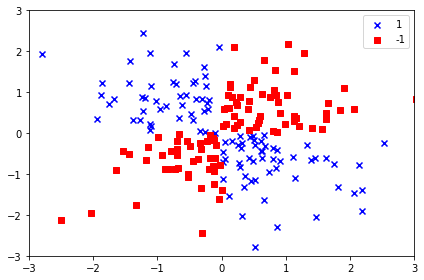

In [13]:
# logical_or 함수를 이용해서 XOR형태의 선형으로 구분할 수 없는 데이터셋 생성
import matplotlib.pyplot as plt
import numpy as np

np.random.seed(1)
X_xor = np.random.randn(200, 2)
y_xor = np.logical_xor(X_xor[:, 0] > 0,
                       X_xor[:, 1] > 0)
y_xor = np.where(y_xor, 1, -1)

plt.scatter(X_xor[y_xor == 1, 0],
            X_xor[y_xor == 1, 1],
            c='b', marker='x',
            label='1')
plt.scatter(X_xor[y_xor == -1, 0],
            X_xor[y_xor == -1, 1],
            c='r',
            marker='s',
            label='-1')

plt.xlim([-3, 3])
plt.ylim([-3, 3])
plt.legend(loc='best')
plt.tight_layout()
plt.show()

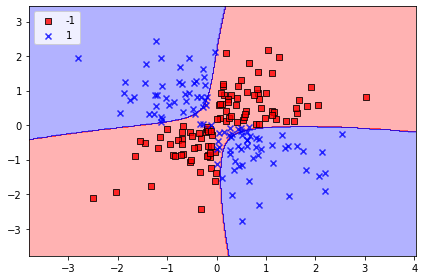

In [16]:
svm = SVC(kernel='rbf', random_state=1, gamma=0.10, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

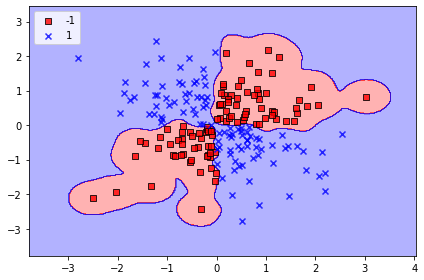

In [18]:
# gamma(r): 가우시안 구의 크기를 제한하는 매개변수
# gamma값을 크게 하면 서포트벡터의 영향력이 줄어둠 > 결정경계가 샘플에 가까워짐

svm = SVC(kernel='rbf', random_state=1, gamma=10.0, C=10.0)
svm.fit(X_xor, y_xor)
plot_decision_regions(X_xor, y_xor,
                      classifier=svm)

plt.legend(loc='upper left')
plt.tight_layout()
plt.show()